<a href="https://colab.research.google.com/github/jericohd/Scrapy_NASA/blob/main/Learning_Curves_A01795534.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Maestría en Inteligencia Artificial Aplicada**

## **Curso: Inteligencia Artificial y Aprendizaje Automático**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad de Semana 7

### **Campañas publicitarias en redes sociales - Modelos de Regresión**

### **Trabajaremos con el archivo "dataset_Facebook.csv" que encuentras en la siguiente liga:**

https://archive.ics.uci.edu/dataset/368/facebook+metrics

### **Estos datos están asociados al siguiente artículo de Moro et.al., que deberás descargar para contestar varias de las preguntas de esta actividad:**

https://www.semanticscholar.org/paper/Predicting-social-media-performance-metrics-and-of-Moro-Rita/dec55692590820754b53c916e29bb2b42c0e5104


### **NOTA: No modifiques el código, salvo en las partes que se te indica.**

In [1]:
# Puedes incluir más librerías, de ser necesario:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve

## **Ejercicio 1**


### **Describe en qué consiste el método llamado de "Curvas de Aprendizaje" (Learning Cures), para monitorear el subentrenamiento o sobrbeentrenamiento de un modelo.**

#### NOTA: Puedes apoyarte en la documentación de sklearn:

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py



### ++++++++ Inicia la sección de agregar texto: +++++++++++

¿Qué son las curvas de aprendizaje?

Las curvas de aprendizaje son un vistazo del entrenamiento del modelo. Te permiten observar cómo este aprende y si está siguiendo el camino correcto.

Se utilizan dos gráficas, en una se muestra el error del modelo en dos conjuntos de datos: uno con el que se entrena y otro independiente para validación.


### ++++++++ Termina la sección de agregar texto. +++++++++++

## **Ejercicio 2**

### **De acuerdo al artículo de Moro et.al., contesta las siguientes preguntas:**

*   **a. ¿Cuál es el objetivo del problema que se plantea en el artículo?**


### ++++++++ Inicia la sección de agregar texto: +++++++++++

como objetivo principal desarrollar un modelo que prediga el impacto de las publicaciones en redes sociales (Facebook) utilizando las características de dichas publicaciones. Específicamente, los objetivos del estudio son:

Implementar un modelo que prediga el impacto de las publicaciones utilizando sus características.

Medir el valor predictivo del modelo cuando se aplica a varias métricas de salida, evaluando la diferencia entre el valor predicho por el modelo y el valor real de la métrica.

Evaluar el conocimiento proporcionado por el modelo en términos de qué características de entrada afectan las métricas de impacto y cómo estas características influyen en cada publicación, apoyando así las decisiones de los gerentes.

Definir una relación causal entre el conocimiento encontrado y la construcción de la marca, relacionando la influencia de las características de entrada y el impacto de las publicaciones en los clientes, y formulando hipótesis sobre cómo dichas métricas pueden contribuir efectivamente al reconocimiento de la marca​​.


### ++++++++ Termina la sección de agregar texto. +++++++++++


*   **b. Describe a continuación el significado de cada una de las 8 variables con la cuales trabajaremos, de acuerdo a la información de las Tablas 2 y 3 del artículo de Moro et.al.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


1. Lifetime post total reach: El número de personas que vieron una publicación de la página (usuarios únicos)​​.

2. Lifetime post total impressions: El número de veces que una publicación de una página se muestra, ya sea que la publicación sea clickeada o no. Las personas pueden ver múltiples impresiones de la misma publicación. Por ejemplo, alguien podría ver una actualización de la página en su News Feed una vez y luego una segunda vez si un amigo la comparte​​.

3. Lifetime engaged users: El número de personas que hicieron clic en cualquier parte de una publicación (usuarios únicos)​​.

4. Lifetime post consumers: El número de personas que hicieron clic en cualquier parte de una publicación​​.

5. Lifetime post consumptions: El número de clics en cualquier parte de una publicación​​.

6. Lifetime post impressions by people who have liked a page: El número total de impresiones solo de personas que han dado "me gusta" a una página​​.

7. Lifetime post reach by people who like a page: El número de personas que vieron una publicación de la página porque le dieron "me gusta" a esa página (usuarios únicos)​​.

8. Lifetime people who have liked a page and engaged with a post: El número de personas que dieron "me gusta" a una página y que hicieron clic en cualquier parte de una publicación (usuarios únicos)​​.


### ++++++++ Termina la sección de agregar texto. +++++++++++

### **En esta actividad trabajarás solamente con el ajuste de modelos, por lo que la parte de procesamiento no la debes modificar. Solo haremos unos ajustes mínimos.**

In [2]:
# Cargamos los datos:

data = pd.read_csv('dataset_Facebook.csv', sep=';', header='infer')

# Separamos los datos de entrada y la variable de salida:
X = data.iloc[:,0:7]   # Las primeras 7 columnas son las variables de entrada.
y = data[['Lifetime Post Consumers']]   # Hay 12 variables de salida, pero solo trabajaremos con la
                                        # que se consideró la más importante en el artículo de reporte.

# Renombramos los niveles de "Type", para tener solo valores numéricos en el DataFrame:
X['Type'] = X['Type'].map({'Photo':1, 'Status':2, 'Link':3, 'Video':4})

# Particionamos en Train, Validation y Test en 60-20-20:
Xtrain, Xtv, ytrain, ytv = train_test_split(X, y, train_size=0.6, shuffle=True, random_state=5)
Xval, Xtest, yval, ytest = train_test_split(Xtv, ytv, test_size=0.5, shuffle=True, random_state=7)


print('Train:', Xtrain.shape, ytrain.shape)
print('Val:', Xval.shape, yval.shape)
print('Test:', Xtest.shape, ytest.shape)

Train: (300, 7) (300, 1)
Val: (100, 7) (100, 1)
Test: (100, 7) (100, 1)


In [3]:
Xtrain.head() # Nuestros datos de entrada

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
92,137059,1,3,11,1,3,0.0
45,138353,3,1,12,4,3,1.0
313,124940,1,3,6,7,3,1.0
46,138353,2,1,12,3,11,0.0
185,134879,1,1,9,1,10,0.0


In [4]:
Xtrain.describe().T   # veamos alguna descripción como datos numéricos

,count,mean,std,min,25%,50%,75%,max
Page total likes,300.0,123511.376667,16211.773474,81370.0,113028.00,130195.5,136393.0,139441.0
Type,300.0,1.216667,0.580959,1.0,1.00,1.0,1.0,4.0
Category,300.0,1.896667,0.849546,1.0,1.00,2.0,3.0,3.0
Post Month,300.0,7.106667,3.306316,1.0,4.00,7.0,10.0,12.0
Post Weekday,300.0,4.180000,2.015226,1.0,2.75,4.0,6.0,7.0
Post Hour,300.0,7.546667,4.348662,1.0,3.00,8.0,11.0,22.0
Paid,299.0,0.290970,0.454971,0.0,0.00,0.0,1.0,1.0


In [6]:
ytrain.describe().T   # lo mismo para la variable de salida

,count,mean,std,min,25%,50%,75%,max
Lifetime Post Consumers,300.0,827.986667,1009.102992,9.0,321.25,543.5,1008.75,11328.0


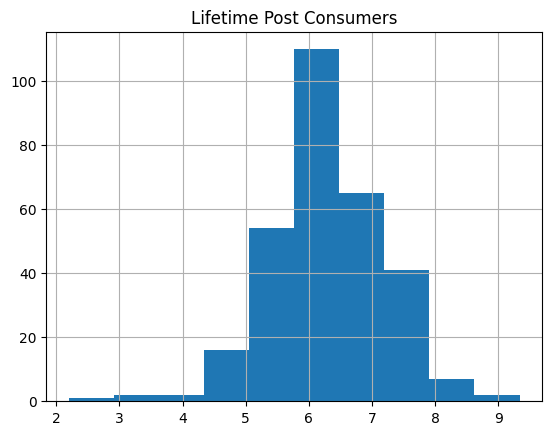

In [7]:
ytrainlog = np.log(ytrain)   # Recordemos que nuestra variable de salida en un problema
ytrainlog.hist();            # de Regresión se recomienda que esté aproximadamente
                             # acampanada, por lo que la ajustaremos con el logaritmo
                             # natural como primera aproximación.

In [8]:
# y procedemos de la misma manera con Val y test:
yvallog = np.log(yval)
ytestlog = np.log(ytest)

In [9]:
# Apliaremos lo mínimo de transformaciones, en particular para datos perdidos:
# Como solo tenemos una numérica, la podemos dejar sin escalar:
num_pipe = Pipeline(steps = [('numImp', SimpleImputer(strategy='median')),
                             ])
num_pipe_nombres = [0]   # ['Page total likes']


# Las ordinales las identificamos como tales:
ord_pipe = Pipeline(steps =  [('OrdImp', SimpleImputer(strategy='most_frequent')),
                              ('Ordfun', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1 ))
                              ])
ord_pipe_nombres = [3,4,5]   # ['Post Month', 'Post Weekday', 'Post Hour']

# Las nominales las transformamos con One-Hot-Encoder:
nom_pipe = Pipeline(steps = [('ohe', OneHotEncoder(drop='first',
                                                   handle_unknown='ignore',
                                                   ))])
nom_pipe_nombres = [1,2,6]   # ['Type', 'Category', 'Paid']


# Conjuntamos las transformaciones que aplicaremos:
columnasTransformer = ColumnTransformer(transformers = [('numpow', num_pipe, num_pipe_nombres),
                                                        ('catOrd', ord_pipe, ord_pipe_nombres),
                                                        ('catNom', nom_pipe, nom_pipe_nombres)
                                                        ],
                                        remainder='passthrough')


# Ajustamos en Train y transformamos en Val y Test:
XtrainFit = columnasTransformer.fit(Xtrain)
XtrainT = XtrainFit.transform(Xtrain)
XvalT  =  XtrainFit.transform(Xval)
XtestT  =  XtrainFit.transform(Xtest)

In [10]:
# El valor de RMSE-Root-Mean-Square-Error, se utiliza para medir el desempeño
# mínimo que debiera obtener un modelo de regresión, es decir, este valor
# se toma usualmente como el valor del modelo subentrenado y se compara generalmente
# con el valor de la desviación estándar de la variable de salida, ya sea que la
# estés tomando de manera original o con los datos transformados.
# Veamos el valor de ambas:

print('Desv-Est y-original: %.3f' % ytrain.values.std())
print('Desv-Est y-logaritmo: %.3f' % ytrainlog.values.std())

Desv-Est y-original: 1007.420
Desv-Est y-logaritmo: 0.906


## **Ejercicio 3**


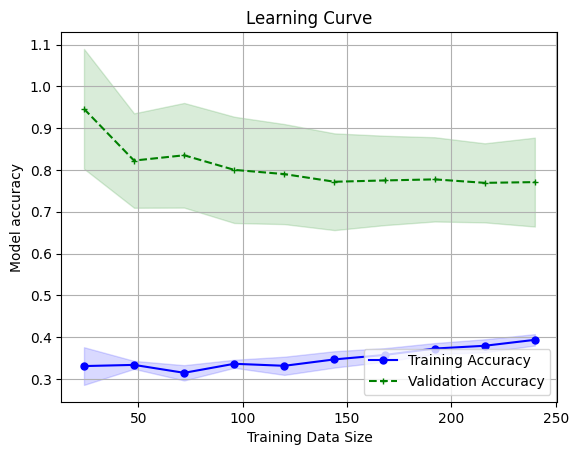

In [62]:
# Al ejecutar las siguientes líneas de código determina si el modelo de
# Bosque Aleatorio con sus valores de hiperparámetros predeterminadas está
# Subentrenado o Sobreentrenado. De ser así, busca los valores de sus
# hiperparámetros que consideres más adecuados para que ya no
# esté sub-o-sobreentrenado:


# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt')

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++



mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes= np.linspace(0.1, 1.0, 10),
                                                        scoring= 'neg_mean_squared_error',  # error MSE
                                                        n_jobs=-1)



# Calculamos los promedios y desviación estándar de entrenamiento para RMSE,
# como tenemos los de MSE, debemos obtener su raíz cuadrada. El negativo es porque
# sklearn nos devuelve en realidad el negativo del Error Cuadrático Medio MSE:

rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)


plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


In [63]:
# Una vez que verifiquemos que no está sobreentrenado o subentrenado el modelo,
# podemos calcular el RMSE del mejor ajuste con los datos de Prueba.
# Incluye los valores de los nejores hiperparámetros encontrados del RandomForest:

# ++++++++++++++ Incluye aquí tus ajustes ++++++++++++++++++++++++++++++

elmodelo_RF = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt')

# +++++++++++++ Tesrmina sección de realizar ajustes +++++++++++++++++++++

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_RF)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de Random Forest: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de Random Forest: 0.735


## **Ejercicio 4**

### **Repite el mismo proceso del Ejercicio 3 anterior para obtener los hiperparámetros que nos lleven a casos de modelos no subentrenados o sobreentrenaos, en cada uno de los siguientes casos:**

*   **a. Extreme Gradient Boost XGBoost**
*   **b. Máquina de Vector Soporte SVM**
*   **c. Red Neuronal Perceptrón Multicapa MLP**

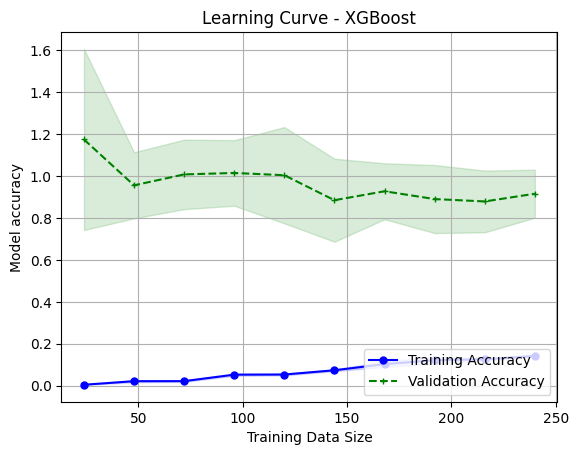

In [73]:

# Modelo inicial con XGBoost
learning_rate = 0.1
n_estimators = 100
elmodelo_XGB = XGBRegressor(learning_rate=learning_rate, n_estimators=n_estimators)

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_XGB)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',
                                                        n_jobs=-1)

# Calculamos RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - XGBoost')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Ajuste de hiperparámetros para XGBoost si es necesario
elmodelo_XGB_ajustado = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8)


In [84]:
elmodelo_XGBRegressor = XGBRegressor()

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_XGBRegressor)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de XGBRegressor: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de XGBRegressor: 0.829


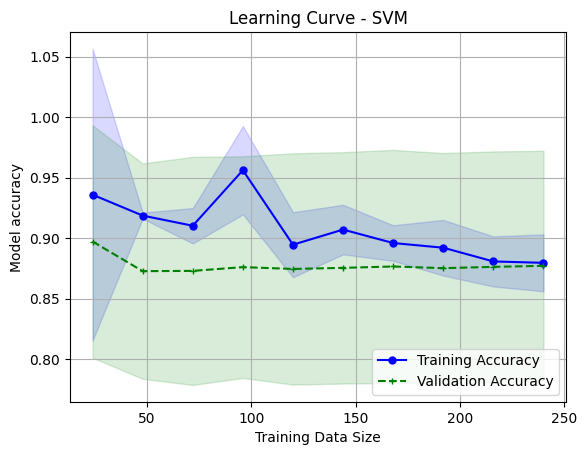

In [76]:


# Modelo inicial con SVM
C = 1.0
epsilon = 0.1

# Crear el modelo
modelo_SVM = SVR(C=C, epsilon=epsilon)

mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_SVM)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',
                                                        n_jobs=-1)

# Calculamos RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - SVM')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Ajuste de hiperparámetros para SVM si es necesario
elmodelo_SVM_ajustado = SVR(C=1.0, epsilon=0.1, kernel='rbf')


In [85]:
elmodelo_SVM_ajustado = SVR(C=C, epsilon=epsilon)

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_SVM_ajustado)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_SVR = mipipe.predict(Xtest)

print('Error RSME(Test) de SVR: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_SVR)))

Error RSME(Test) de SVR: 0.935


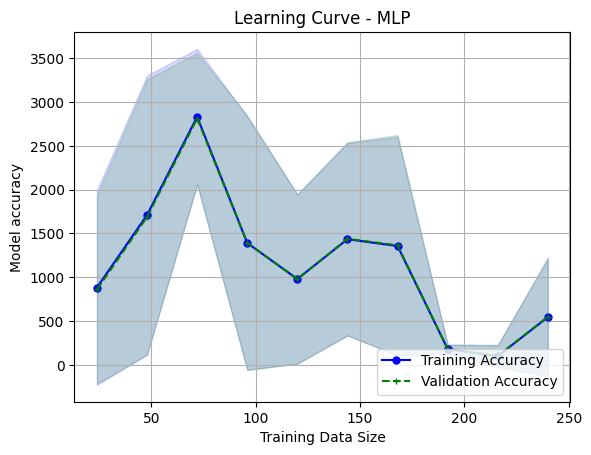

In [80]:
# Ajustar los parámetros
learning_rate = 0.01
max_iter = 1000
alpha = 0.1

# Crear el modelo
modelo_MLP = MLPRegressor(learning_rate=learning_rate, max_iter=max_iter, alpha=alpha)


mipipe = Pipeline(steps=[('ct', columnasTransformer), ('m', elmodelo_MLP)])

train_sizes, train_scores, val_scores = learning_curve(estimator=mipipe,
                                                        X=XtrainT,
                                                        y=np.ravel(ytrainlog),
                                                        cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='neg_mean_squared_error',
                                                        n_jobs=-1)

# Calculamos RMSE
rmse_train_scores = np.sqrt(-train_scores)
rmse_val_scores = np.sqrt(-val_scores)

train_mean = np.mean(rmse_train_scores, axis=1)
train_std = np.std(rmse_train_scores, axis=1)
val_mean = np.mean(rmse_val_scores, axis=1)
val_std = np.std(rmse_val_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, val_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.15, color='green')

plt.title('Learning Curve - MLP')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Ajuste de hiperparámetros para MLP si es necesario
elmodelo_MLP_ajustado = MLPRegressor(hidden_layer_sizes=(100,), max_iter=2000, learning_rate_init=0.001)


In [86]:
elmodelo_MLPRegressor = MLPRegressor()

mipipe = Pipeline(steps=[('ct',columnasTransformer),('m', elmodelo_MLPRegressor)])
mipipe.fit(Xtrain, np.ravel(ytrainlog))
yhattest_RF = mipipe.predict(Xtest)

print('Error RSME(Test) de MLPRegressor: %.3f' % np.sqrt(mean_squared_error(np.ravel(ytestlog), yhattest_RF)))

Error RSME(Test) de MLPRegressor: 1.126


# **Ejercicio 5**

### **Incluye tus conclusiones finales de la Actividad.**
### **En particular indica cuál consideras que fue el mejor modelo obtenido.**

### ++++++++ Inicia la sección de agregar texto: +++++++++++


El modelo XGBoost con un error RSME de .829 se destaca como el mejor de los cuatro evaluados.

Su curva de error en el conjunto de entrenamiento disminuye constantemente, indicando un buen aprendizaje de los datos. La curva de error en el conjunto de validación también disminuye y se estabiliza en un nivel bajo, lo que refleja una buena generalización a nuevos datos y ausencia de sobreentrenamiento.

En comparación con los demás modelos, XGBoost presenta el menor error en el conjunto de validación, confirmando su rendimiento superior.

La gráfica del ganador muestra:

Eje X: Número de iteraciones de entrenamiento.

Eje Y: Error en el conjunto de entrenamiento y error en el conjunto de validación.

Curva de error en el conjunto de entrenamiento: Disminuye constantemente, indicando un buen aprendizaje.
Curva de error en el conjunto de validación: Disminuye y se estabiliza en un nivel bajo, reflejando buena generalización y ausencia de sobreentrenamiento.

### ++++++++ Termina la sección de agregar texto. +++++++++++

>> **Fin de la Actividad de la Semana 7**